In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers

# Load the Fashion-MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Split data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Print the shapes of the new sets
print("Training set shape:", x_train.shape)
print("Training labels shape:", y_train.shape)

print("\nValidation set shape:", x_val.shape)
print("Validation set shape:", y_val.shape)

print("\nTest set shape:", x_test.shape)
print("Test labels shape:", y_test.shape)

# Define class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


Training set shape: (48000, 28, 28)
Training labels shape: (48000,)

Validation set shape: (12000, 28, 28)
Validation set shape: (12000,)

Test set shape: (10000, 28, 28)
Test labels shape: (10000,)


In [ ]:
# #Normalize the data

x_train = (x_train - 0.2860) / 0.3530
x_val = (x_val - 0.2860) / 0.3530
x_test = (x_test - 0.2860) / 0.3530


In [ ]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_val = x_val.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

x_train[0].shape

(28, 28, 1)

# Early Stopping with Validation Loss as criteria

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Additional layer for more complexity
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.optimizers import Adam

cnn.compile(optimizer=Adam(learning_rate=0.001),  # Adjust learning rate
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [ ]:
early_stopping_loss = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

baseline_cnn = cnn.fit(x_train, y_train,
                        validation_data=(x_val, y_val),
                        epochs=50,
                        batch_size=16,
                        callbacks=[early_stopping_loss])  # Experiment with smaller batch size



Epoch 1/50
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.5676 - loss: 2.0933 - val_accuracy: 0.7932 - val_loss: 0.5805
Epoch 2/50
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.7652 - loss: 0.6513 - val_accuracy: 0.8242 - val_loss: 0.4849
Epoch 3/50
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7988 - loss: 0.5523 - val_accuracy: 0.8315 - val_loss: 0.4532
Epoch 4/50
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8112 - loss: 0.5189 - val_accuracy: 0.8292 - val_loss: 0.4463
Epoch 5/50
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8231 - loss: 0.4981 - val_accuracy: 0.8328 - val_loss: 0.4746
Epoch 6/50
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8302 - loss: 0.4717 - val_accuracy: 0.8414 - val_loss: 0.4470
Epoch 7/50
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8321 - loss: 0.4564 - val_accuracy: 0.8437 - val_loss: 0.4421
Epoch 8/50
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8408 - loss: 0.444

Final training accuracy: 0.8535
Final validation accuracy: 0.8593
Final training loss: 0.4039
Final validation loss: 0.4217


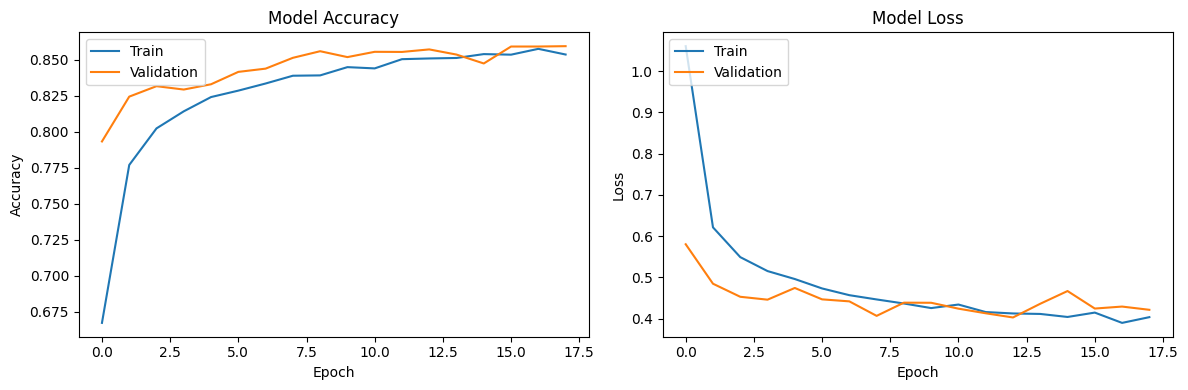

In [ ]:
print(f"Final training accuracy: {baseline_cnn.history['accuracy'][-1]:.4f}")
print(f"Final validation accuracy: {baseline_cnn.history['val_accuracy'][-1]:.4f}")
print(f"Final training loss: {baseline_cnn.history['loss'][-1]:.4f}")
print(f"Final validation loss: {baseline_cnn.history['val_loss'][-1]:.4f}")

import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(baseline_cnn.history['accuracy'])
plt.plot(baseline_cnn.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(baseline_cnn.history['loss'])
plt.plot(baseline_cnn.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

# Early Stopping with Validation Accuracy as criteria

In [ ]:
from tensorflow.keras.optimizers import Adam

cnn_2 = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Additional layer for more complexity
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])


cnn_2.compile(optimizer=Adam(learning_rate=0.001),  # Adjust learning rate
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

# Define early stopping based on validation accuracy
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',  # Monitor validation accuracy
    patience=5,              # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True # Restore model weights from the epoch with the best validation accuracy
)


baseline_cnn_2 = cnn_2.fit(x_train, y_train,
                        validation_data=(x_val, y_val),
                        epochs=50,
                        batch_size=16,callbacks=[early_stopping],
                        verbose=1)  # Experiment with smaller batch size

Epoch 1/50
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.5525 - loss: 1.7483 - val_accuracy: 0.8090 - val_loss: 0.5254
Epoch 2/50
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7790 - loss: 0.6171 - val_accuracy: 0.8233 - val_loss: 0.4799
Epoch 3/50
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8067 - loss: 0.5267 - val_accuracy: 0.8361 - val_loss: 0.4364
Epoch 4/50
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8224 - loss: 0.4935 - val_accuracy: 0.8348 - val_loss: 0.4330
Epoch 5/50
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8306 - loss: 0.4655 - val_accuracy: 0.8493 - val_loss: 0.4384
Epoch 6/50
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8454 - loss: 0.4261 - val_accuracy: 0.8501 - val_loss: 0.4006
Epoch 7/50
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8433 - loss: 0.4199 - val_accuracy: 0.8534 - val_loss: 0.3957
Epoch 8/50
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8483 - loss: 0.4120

Final training accuracy: 0.8697
Final validation accuracy: 0.8591
Final training loss: 0.3641
Final validation loss: 0.4805


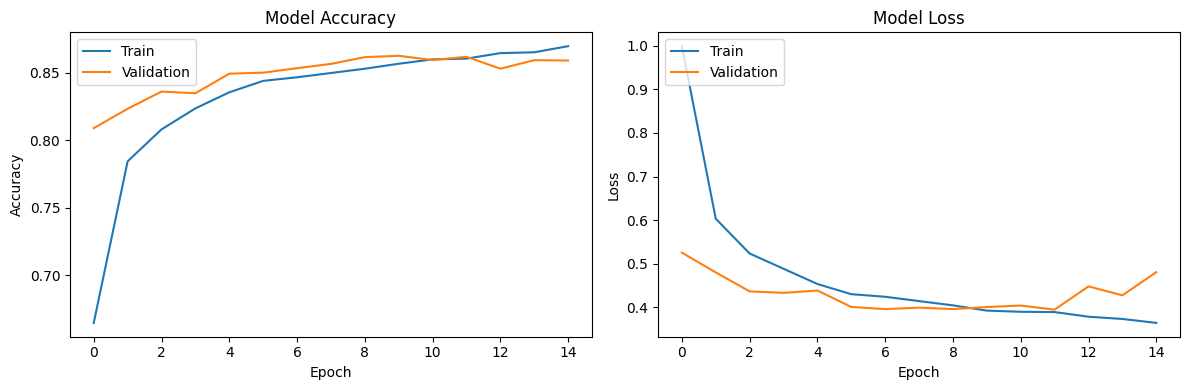

In [ ]:
print(f"Final training accuracy: {baseline_cnn_2.history['accuracy'][-1]:.4f}")
print(f"Final validation accuracy: {baseline_cnn_2.history['val_accuracy'][-1]:.4f}")
print(f"Final training loss: {baseline_cnn_2.history['loss'][-1]:.4f}")
print(f"Final validation loss: {baseline_cnn_2.history['val_loss'][-1]:.4f}")

import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(baseline_cnn_2.history['accuracy'])
plt.plot(baseline_cnn_2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(baseline_cnn_2.history['loss'])
plt.plot(baseline_cnn_2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()